In [39]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [40]:
df_Ind = df[df['job_country'] == 'India'].copy()

In [41]:
df_Ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [42]:
df_skills = df_Ind.explode('job_skills')
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785716,Software Engineer,c#
785716,Software Engineer,sql
785718,Business Analyst,None
785740,Software Engineer,aws


In [43]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill count').sort_values(by='skill count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [44]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

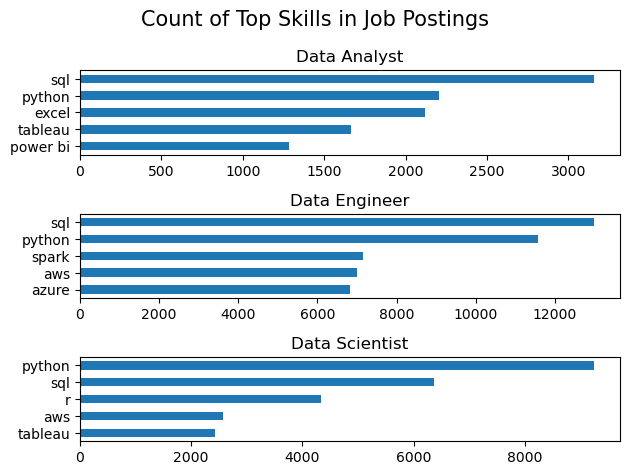

In [45]:
fig , ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x='job_skills', y='skill count', ax=ax[i], legend=False, title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()

In [46]:
df_job_title_count = df_Ind['job_title_short'].value_counts().reset_index(name = 'Jobs_total')

In [47]:
df_skills_percent = pd.merge(df_skills_count,df_job_title_count, how = 'left', on='job_title_short')

df_skills_percent['skill_perc'] = (df_skills_percent['skill count'] / df_skills_percent['Jobs_total'] ) * 100

df_skills_percent.head(10)

,job_skills,job_title_short,skill count,Jobs_total,skill_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
5,azure,Data Engineer,6819,19062,35.772742
6,sql,Data Scientist,6367,13279,47.947888
7,r,Data Scientist,4327,13279,32.585285
8,java,Data Engineer,4023,19062,21.104816
9,hadoop,Data Engineer,3999,19062,20.978911


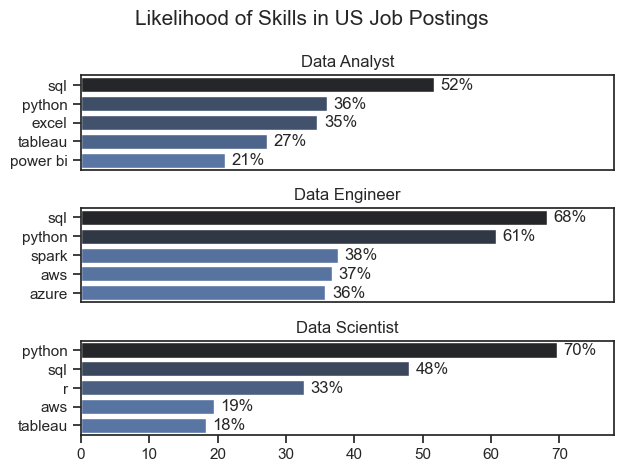

In [49]:
fig , ax = plt.subplots(len(job_titles),1)

sns.set_theme(style="ticks")

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind = 'barh', x='job_skills', y='skill_perc', ax=ax[i], legend=False, title = job_title)

    sns.barplot(data=df_plot, y='job_skills', x='skill_perc', ax=ax[i],hue ='skill count', palette='dark:b_r',legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)

    for n,v in enumerate (df_plot['skill_perc']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center' )

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    



fig.suptitle('Likelihood of Skills in US Job Postings', fontsize=15)
plt.tight_layout()